
# Regresja liniowa

W tym notebooku stworzymy model regresji liniowej dla zbioru danych o nieruchomościach w Bostonie - celem zadania jest przewidywanie cen domów na podstawie cech liczbowych


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston

In [ ]:
boston_data = load_boston()
boston_X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

y =  boston_data.target

In [ ]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Multiple linear regression

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(boston_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pobieramy współczynniki .coef_

In [ ]:
regr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
pd.DataFrame({'names': boston_X.columns.tolist(), 'coeffs': regr.coef_})

,names,coeffs
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335



Teraz możemy dokonać predykcji dla danych za pomocą tak wyszkolonego modelu

In [ ]:
predictions_scikit = regr.predict(boston_X)

Sprawdzamy $R^2$

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y, predictions_scikit))

0.7406426641094095


# Istotnośc parametrów i dobór zmiennych 

Zadania regresyjne wymagają zazwyczaj wyboru zmiennych popartego odrzuceniem tych, których wpływ nie jest w statystycznie istotny sposób różny od zera. Interpretowalność bazowo wyliczonej istotności warunkowana jest spełnieniem kilku założeń, natomiast nawet jeśli są one podważone może służyć do kierunkowej oceny "ważności" zmiennych.

Aby przenalizować istotnośc, wykorzystajmy alternatywną bibliotekę, jako że sklearn bazowo jej nie wylicza.

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


statsmodel oferują funkcje do dodawania wyrazu stałego z któej powiinśmy skorzystać

In [ ]:
X = sm.add_constant(boston_X)

In [ ]:
X

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        08:53:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [ ]:
model = sm.OLS(y, X.drop(["AGE", "INDUS", "RAD"], axis=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          2.41e-133
Time:                        13:41:34   Log-Likelihood:                -1510.0
No. Observations:                 506   AIC:                             3042.
Df Residuals:                     495   BIC:                             3089.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7398      4.975      5.978      0.0

(array([  1.,   5., 107., 251.,  92.,  29.,  14.,   4.,   0.,   3.]),
 array([-15.59835033, -11.41478536,  -7.23122039,  -3.04765542,
          1.13590955,   5.31947453,   9.5030395 ,  13.68660447,
         17.87016944,  22.05373441,  26.23729938]),
 <a list of 10 Patch objects>)

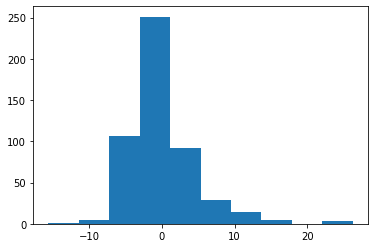

In [ ]:
plt.hist(y-results.predict(X.drop(["AGE", "INDUS"], axis=1)))

# Najczęstsze wyzwania związane z prostą regresją

Gdy spełniony jest szereg założeń regresja teoretycznie jest najbardziej efktywnym modelem. W praktyce rzadko spotykamy się z danymi, dla których są one w mocy. Mimo to regresja wciąż może być wtedy pomocnym narzędziem w analizie danych.

Stosowanie regresji może okazać się utrudnione w wypadku, gdy:
 - zależności nie są liniowe
 - mamy silnie skorelowane ze sobą zmienne
 - mamy dużą liczbę zmiennych (i mało danych)
 - w zbiorze występują outliery

## Nieliniowość

Z nieliniowością zależności można probówać "walczyć" przekształcając zmienne, czy to zależne, czy niezależne.

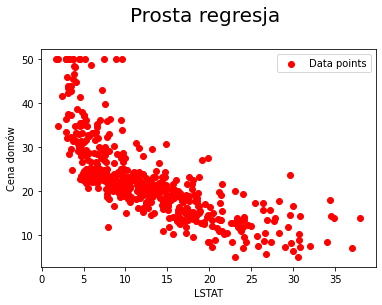

In [ ]:
x = X["LSTAT"]

x_domain = np.linspace(np.min(x), np.max(x), 1000)

# data points
plt.scatter(x, y, c='red', label='Data points')

plt.title('Prosta regresja \n', size=20)
plt.xlabel('LSTAT')
plt.ylabel('Cena domów')
plt.legend()
plt.show()

In [ ]:
model = sm.OLS(y, X[["const", "LSTAT"]])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           5.08e-88
Time:                        13:32:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

(array([  1.,  21., 143., 177.,  75.,  43.,  18.,   8.,  17.,   3.]),
 array([-15.16745197, -11.20069383,  -7.23393569,  -3.26717754,
          0.6995806 ,   4.66633875,   8.63309689,  12.59985503,
         16.56661318,  20.53337132,  24.50012946]),
 <a list of 10 Patch objects>)

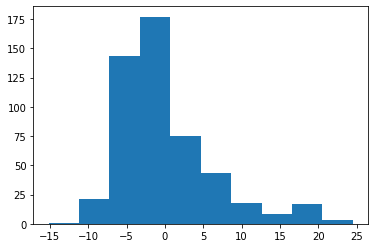

In [ ]:
plt.hist(y-results.predict(X[["const", "LSTAT"]]))

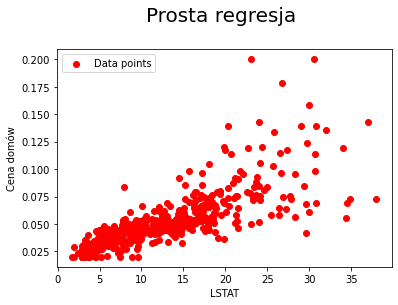

In [ ]:
x_domain = np.linspace(np.min(x), np.max(x), 1000)

# data points
plt.scatter(x, 1/y, c='red', label='Data points')

plt.title('Prosta regresja \n', size=20)
plt.xlabel('LSTAT')
plt.ylabel('Cena domów')
plt.legend()
plt.show()

In [ ]:
model = sm.OLS(1/y, X[["const", "LSTAT"]])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     724.5
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.42e-99
Time:                        13:37:41   Log-Likelihood:                 1378.1
No. Observations:                 506   AIC:                            -2752.
Df Residuals:                     504   BIC:                            -2744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.001     13.014      0.0

(array([  3.,  37., 147., 181.,  84.,  26.,  20.,   4.,   1.,   3.]),
 array([-13.23594925,  -9.17539524,  -5.11484122,  -1.0542872 ,
          3.00626682,   7.06682084,  11.12737486,  15.18792888,
         19.2484829 ,  23.30903692,  27.36959093]),
 <a list of 10 Patch objects>)

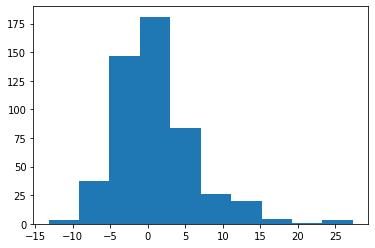

In [ ]:
plt.hist(y-1/results.predict(X[["const", "LSTAT"]]))

Spróbujmy dopasować model z takim przekształceniem.


In [ ]:
regr.fit(X[["LSTAT", "const"]], 1/y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(r2_score(y, 1/regr.predict(X[["LSTAT", "const"]])))

0.5441462975864797


## Współlinowość

Współinowośc cech może poważnie zaburzyć wyniki modelu. Analizować problemy z nią związane możemy wykorzystując proste korelacje między zmiennymi lub m.in. wskaźnik Variance Infaltion Ratio.

In [ ]:
corr = boston_X.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,b0
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,nan
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,nan
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,nan
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,nan
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,nan
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,nan
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,nan
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,nan
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,nan
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,nan


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.drop("const", axis=1).columns 

vif_data["VIF"] = [variance_inflation_factor(X.drop("const", axis=1).values, i) 
                          for i in range(len(X.drop("const", axis=1).columns))] 
  
print(vif_data)
#reguła kciuka stwierdza że VIF powyżej 5 uważany jest za wysoki

    feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [ ]:
model = sm.OLS(y, X.drop(["AGE", "INDUS", "PTRATIO"], axis=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          4.99e-127
Time:                        13:43:58   Log-Likelihood:                -1525.0
No. Observations:                 506   AIC:                             3072.
Df Residuals:                     495   BIC:                             3119.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1995      4.281      3.317      0.0

## Duża liczba zmiennych

Zbyt duża liczba zmiennych często prowadzi do problemów opisanych już w innych miejscach. Dodatkowo może sprzyjać overfittingowi. 

W praktyce selekcję zmiennych przperowadza się ręcznie (wykorzystując opmówione już wcześniej metody), backward albo forward selection, lub obecnie najczęściej podejścia rozbudowujące prostą regresję jak regresja lasso, ridge albo elastic net.

Przykład implementacji algorytmu foreward selection (na bazie https://planspace.org/20150423-forward_selection_with_statsmodels/): 

In [ ]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
boston_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
dt = pd.concat([boston_X.reset_index(drop=True), pd.DataFrame(y, columns = ["target"]).reset_index(drop=True)], axis=1)
model = forward_selected(dt, 'target')

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          5.54e-137
Time:                        10:43:27   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

## Outliery

Outliery mogą poważnie zaburzyć wyniki regresji (bardziej niż w większości innych metod). Powinny być zidentyfikowe w czasie EDA. 